<a href="https://colab.research.google.com/github/Stanislav-Fadeev/Neural_Networks_and_CV/blob/master/classification_handwritten_digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [133]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [134]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [135]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [136]:
X_train = X_train.float()
X_test = X_test.float()


In [137]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [138]:
print(
x.reshape(-1,1,1).shape,
x.reshape(-1,6000).shape,
x.shape,
x.reshape(-1).shape,
x.reshape(-1,14,32,7).shape,sep='\n')

torch.Size([47040000, 1, 1])
torch.Size([7840, 6000])
torch.Size([15000, 14, 32, 7])
torch.Size([47040000])
torch.Size([15000, 14, 32, 7])


In [139]:
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([10000]))

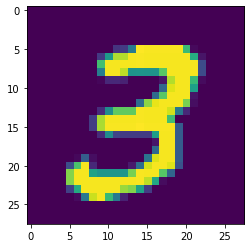

tensor(3)


In [140]:
import matplotlib.pyplot as plt
plt.imshow(X_train[7, :])
plt.show()
print(y_train[7])

In [141]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])


In [142]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10) 
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x
    
mnist_net = MNISTNet(100)

In [143]:
torch.cuda.is_available()

True

In [ ]:
!nvidia-smi

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mnist_net = mnist_net.to(device)
list(mnist_net.parameters())

In [146]:
order = np.random.permutation(len(X_train))
len(X_train)

60000

In [147]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

In [ ]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(10000):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = mnist_net.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print(accuracy)

In [ ]:
test_loss_history

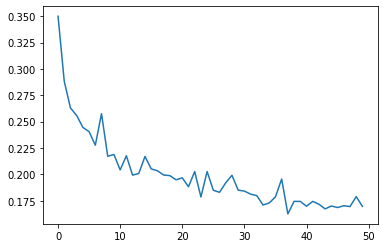

In [161]:
#plt.plot(test_accuracy_history)
plt.plot(test_loss_history);

Text(0, 0.5, 'Loss Function Value')

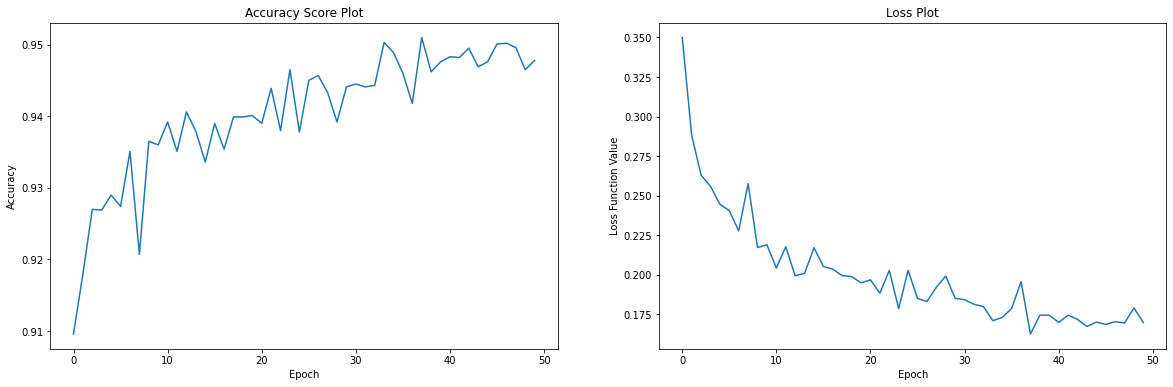

In [162]:
f, ax = plt.subplots(1, 2, figsize=(20, 6))

 

ax[0].plot(test_accuracy_history)

ax[0].set_title('Accuracy Score Plot')

ax[0].set_xlabel('Epoch')

ax[0].set_ylabel('Accuracy')

 

ax[1].plot(test_loss_history);

ax[1].set_title('Loss Plot')

ax[1].set_xlabel('Epoch')

ax[1].set_ylabel('Loss Function Value')